In [53]:
from random import randint

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [2]:
data = pd.read_csv('data/A_Z Handwritten Data.csv', header=None)
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
57300,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91035,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118006,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241275,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189764,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
231623,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
349791,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27275,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87563,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326610,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(372451, 785)

In [4]:
data = data.sample(frac=0.05).reset_index(drop=True)
data.shape

(18623, 785)

In [5]:
sorted(data[0].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

In [10]:
alphabet_list = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
lookup = dict(zip(range(len(alphabet_list)), alphabet_list))
lookup

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [11]:
features = data[data.columns[1:]]
labels = data[0]

In [12]:
features.shape

(18623, 784)

In [13]:
features = features.values.reshape(-1, 28, 28)
features.shape

(18623, 28, 28)

In [18]:
def show_image(features, actual_label):
    
    plt.imshow(features, cmap='gray')
    plt.title(f'Actual Label: {lookup[actual_label]}')
    plt.show();

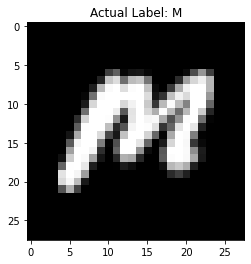

In [19]:
show_image(features[0], labels[0])

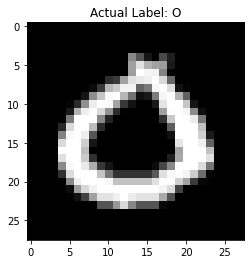

In [20]:
show_image(features[100], labels[100])

In [21]:
features = features / 255.0

In [22]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [23]:
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((14898, 28, 28), (3725, 28, 28), (14898,), (3725,))

In [28]:
stacked_encoder = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu')
])

In [29]:
stacked_encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
Total params: 52,848
Trainable params: 52,848
Non-trainable params: 0
_________________________________________________________________


In [30]:
stacked_decoder = Sequential([
    layers.Dense(32, activation='relu', input_shape=(16,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(28 * 28, activation='relu'),
    layers.Reshape((28, 28))
])

In [31]:
stacked_decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 53,616
Trainable params: 53,616
Non-trainable params: 0
_________________________________________________________________


In [32]:
ae_model = Sequential([stacked_encoder, stacked_decoder])
ae_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 16)                52848     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            53616     
Total params: 106,464
Trainable params: 106,464
Non-trainable params: 0
_________________________________________________________________


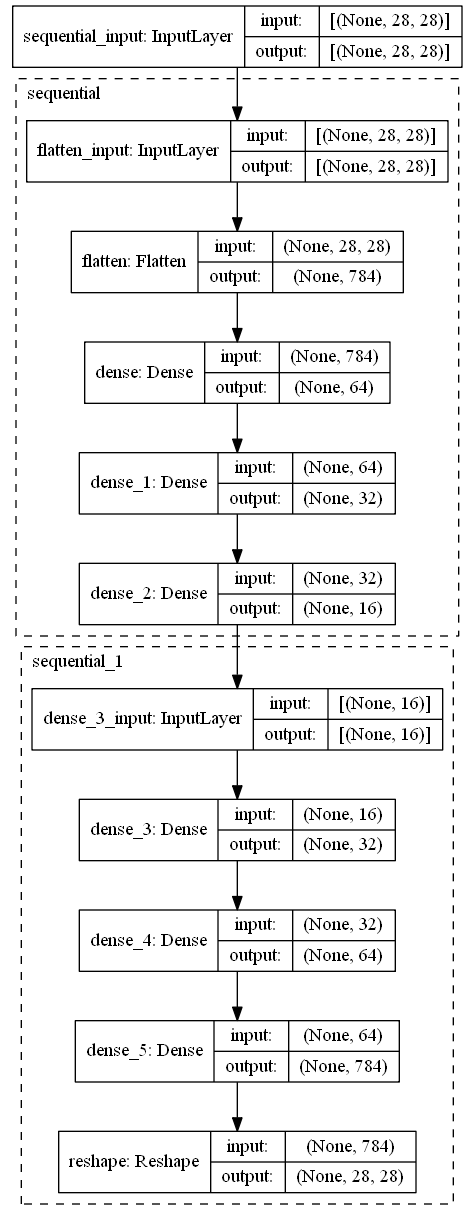

In [35]:
plot_model(ae_model, show_shapes=True, expand_nested=True)

In [36]:
ae_model.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])

In [37]:
hist = ae_model.fit(train_images, train_images, epochs=10, batch_size=32)

Epoch 1/10
466/466 [==============================] - 3s 3ms/step - loss: 0.0596 - mse: 0.0596
Epoch 2/10
466/466 [==============================] - 1s 3ms/step - loss: 0.0441 - mse: 0.0441
Epoch 3/10
466/466 [==============================] - 1s 3ms/step - loss: 0.0389 - mse: 0.0389
Epoch 4/10
466/466 [==============================] - 1s 3ms/step - loss: 0.0362 - mse: 0.0362
Epoch 5/10
466/466 [==============================] - 1s 3ms/step - loss: 0.0343 - mse: 0.0343
Epoch 6/10
466/466 [==============================] - 1s 3ms/step - loss: 0.0331 - mse: 0.0331A: 0s - loss: 0.0334 -
Epoch 7/10
466/466 [==============================] - 1s 3ms/step - loss: 0.0320 - mse: 0.0320
Epoch 8/10
466/466 [==============================] - 1s 3ms/step - loss: 0.0314 - mse: 0.0314
Epoch 9/10
466/466 [==============================] - 1s 2ms/step - loss: 0.0310 - mse: 0.0310
Epoch 10/10
466/466 [==============================] - 1s 2ms/step - loss: 0.0304 - mse: 0.0304


In [38]:
def reconstruct_img(model, images, n_imgs):

    random_int = randint(0, len(images) - n_imgs)
    reconstructions = model.predict(images[random_int:random_int + n_imgs])

    fig = plt.figure(figsize=(n_imgs * 3, 3))

    for img_index in range(n_imgs):
        plt.subplot(2, n_imgs, 1 + img_index)
        plt.imshow(images[random_int + img_index])
    
        plt.subplot(2, n_imgs, 1 + n_imgs + img_index)
        plt.imshow(reconstructions[img_index])

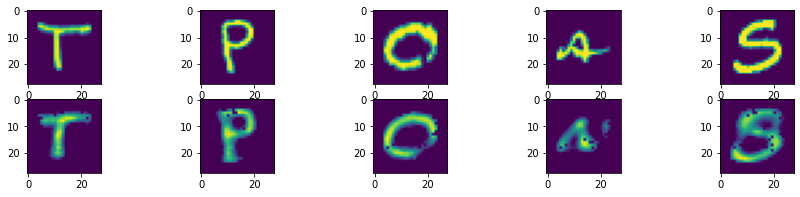

In [39]:
reconstruct_img(ae_model, test_images, 5)

In [40]:
conv_enocder = Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(16, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2)
])

In [41]:
conv_enocder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [42]:
conv_decoder = Sequential([
    layers.Conv2DTranspose(32, 3, activation='relu', padding='valid', input_shape=(3, 3, 64), strides=2),
    layers.Conv2DTranspose(16, 3, activation='relu', padding='same', strides=2),
    layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same', strides=2),
    layers.Reshape((28, 28))
])

In [43]:
conv_decoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 7, 7, 32)          18464     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         145       
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 23,233
Trainable params: 23,233
Non-trainable params: 0
_________________________________________________________________


In [44]:
conv_ae_model = Sequential([conv_enocder, conv_decoder])
conv_ae_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 3, 3, 64)          23296     
_________________________________________________________________
sequential_4 (Sequential)    (None, 28, 28)            23233     
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


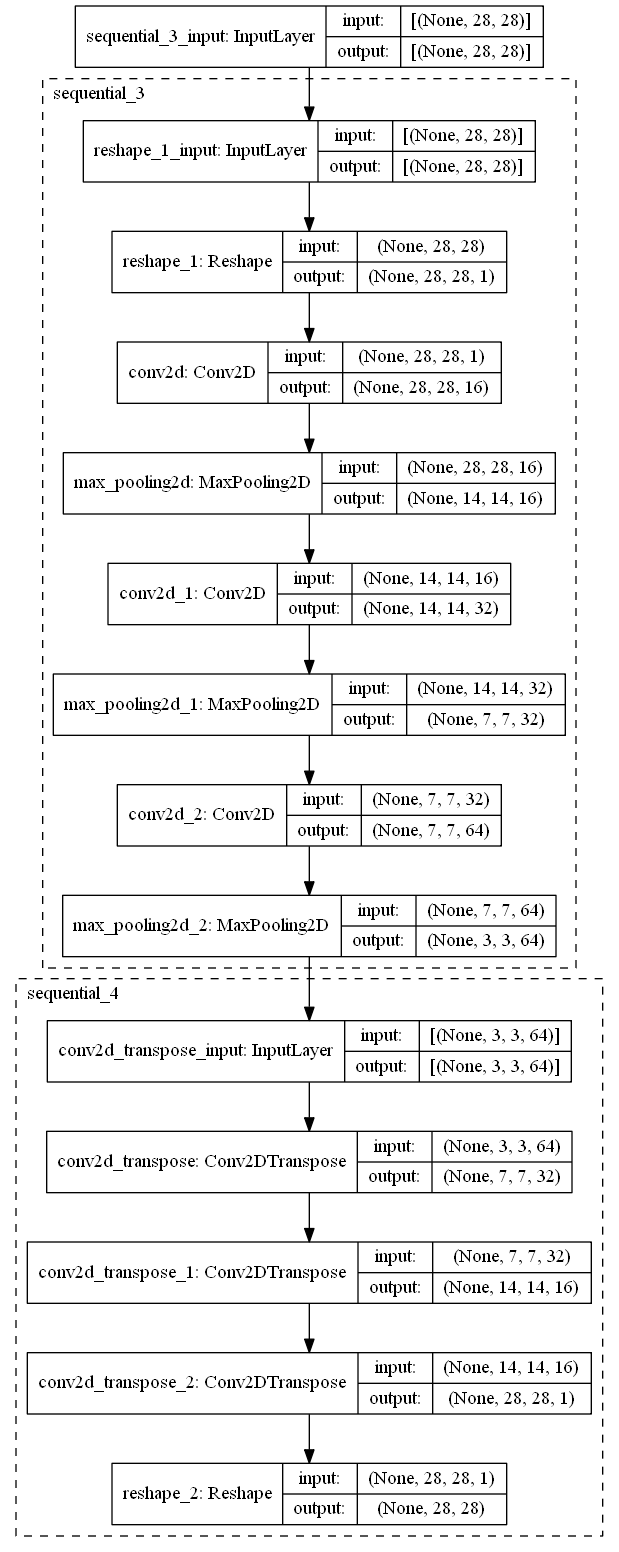

In [45]:
plot_model(conv_ae_model, show_shapes=True, expand_nested=True)

In [54]:
conv_ae_model.compile(optimizer=optimizers.Adam(0.01), loss=losses.BinaryCrossentropy(), metrics=['mse'])

In [55]:
hist = conv_ae_model.fit(train_images, train_images, epochs=10)

Epoch 1/10
466/466 [==============================] - 5s 8ms/step - loss: 0.1346 - mse: 0.0195
Epoch 2/10
466/466 [==============================] - 4s 8ms/step - loss: 0.0995 - mse: 0.0079
Epoch 3/10
466/466 [==============================] - 4s 8ms/step - loss: 0.0950 - mse: 0.0064
Epoch 4/10
466/466 [==============================] - 4s 9ms/step - loss: 0.0926 - mse: 0.0057
Epoch 5/10
466/466 [==============================] - 4s 8ms/step - loss: 0.0911 - mse: 0.0052
Epoch 6/10
466/466 [==============================] - 4s 9ms/step - loss: 0.0900 - mse: 0.0049
Epoch 7/10
466/466 [==============================] - 4s 9ms/step - loss: 0.0893 - mse: 0.0046
Epoch 8/10
466/466 [==============================] - 4s 9ms/step - loss: 0.0885 - mse: 0.0044
Epoch 9/10
466/466 [==============================] - 4s 10ms/step - loss: 0.0881 - mse: 0.0043
Epoch 10/10
466/466 [==============================] - 5s 10ms/step - loss: 0.0877 - mse: 0.0042


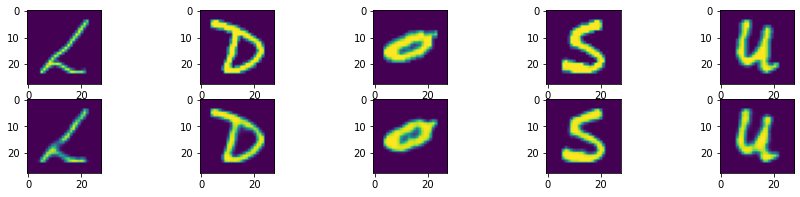

In [56]:
reconstruct_img(conv_ae_model, test_images, 5)

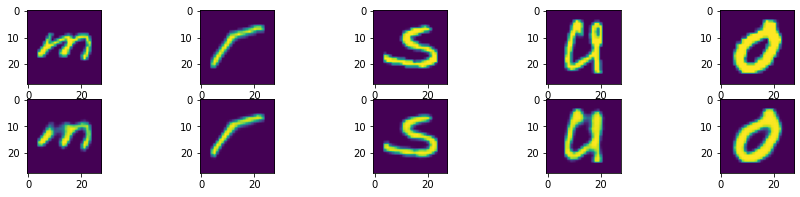

In [57]:
reconstruct_img(conv_ae_model, test_images, 5)